In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# KMeans
from sklearn.cluster import KMeans

In [2]:
df = pd.read_pickle('../data/pickled_listings_df')

In [3]:
num_only_df = df[['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                'minimum_nights', 'maximum_nights', 'review_scores_rating', 
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 
                'calculated_host_listings_count_shared_rooms', 'host_loc_denver', 'is_superhost', 'needs_license', 
                'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
                'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [4]:
few_categorical_df = df[['price', 'minimum_nights', 'maximum_nights','review_scores_rating','host_loc_denver', 
                        'needs_license','room_type_Entire home/apt', 'room_type_Private room',
                        'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [5]:
y_target_vals = df.loc[:,['is_violating']].values

## Plot PCA, n_components = 5, plot first 2, all num_cat's

In [6]:
# features = ['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
# 'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
# 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
# 'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
# 'room_type_Shared room', 'current_license', 'list_loc_denver']

# # Separating out the features
# x = num_only_df.loc[:, features].values

# # Separating out the target
# y = df.loc[:,['is_violating']].values

# # Standardizing the features
# x = StandardScaler().fit_transform(x)

# pca = PCA(n_components=5)

# num_only_principalComponents = pca.fit_transform(x)

# principalDf = pd.DataFrame(data = num_only_principalComponents
#              , columns = ['principal component 1', 'principal component 2',
#                           'principal component 3', 'principal component 4',
#                           'principal component 5'])

# num_only_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('n_comp = 5, first 2', fontsize = 20)
# targets = [0,1]
# colors = ['r', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = num_only_pcaDf['is_violating'] == target
#     ax.scatter(num_only_pcaDf.loc[indicesToKeep, 'principal component 1']
#                , num_only_pcaDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [7]:
# total_variance = np.sum(pca.explained_variance_)
# cum_variance = np.cumsum(pca.explained_variance_)
# prop_var_expl = cum_variance/total_variance

# fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
# ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
# ax.set_ylabel('cumulative prop. of explained variance')
# ax.set_xlabel('number of principal components')
# ax.legend();

In [8]:
# print(f'PCA explained variance is {pca.explained_variance_}')
# print(f'\nPCA explained variance ratio is {pca.explained_variance_ratio_}')

## KMeans - 10 clusters
#### Plot PCA, n_components = 5, plot first 2, all num_cat's

In [9]:
# kmeans = KMeans(n_clusters=10)

# X_clustered_num = kmeans.fit_predict(num_only_principalComponents)

# # Plot the scatter diagram
# plt.figure(figsize = (7,7))
# plt.scatter(num_only_principalComponents[:,0],num_only_principalComponents[:,1], 
#             c=kmeans.labels_,cmap='rainbow', alpha=0.5) 


In [10]:
# numkmeans = kmeans.labels_

# kmeans_y = y_target_vals
# kmeans_y = kmeans_y.reshape(4511)

# num_KMeansDF = pd.DataFrame({'kmeans_cluster':numkmeans, 'target':kmeans_y})

# sns.barplot(x='kmeans_cluster',y='target',data=num_KMeansDF)

In [11]:
# num_8 = num_KMeansDF.loc[num_KMeansDF['kmeans_cluster'] == 4]
# num_8.loc[2500:3000]

In [12]:
# df.loc[[2987]]

## Plot PCA, n_components = 5, plot first 2, all num_cat's

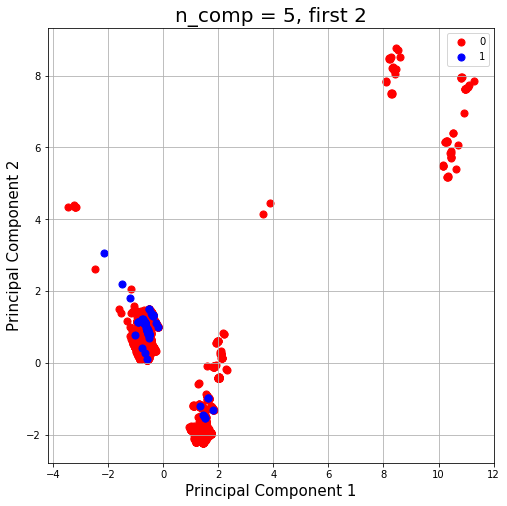

In [13]:
features = ['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']

# Separating out the feature
x = few_categorical_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

few_principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = few_principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

few_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('n_comp = 5, first 2', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = few_pcaDf['is_violating'] == target
    ax.scatter(few_pcaDf.loc[indicesToKeep, 'principal component 1']
               , few_pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


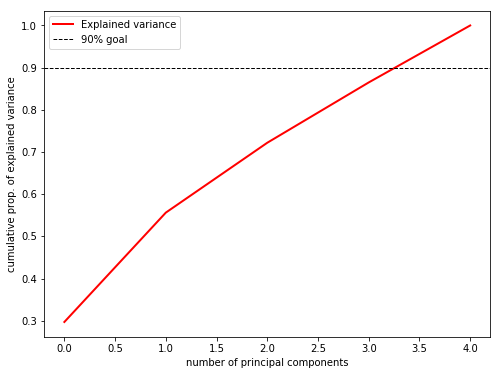

In [14]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

## KMeans

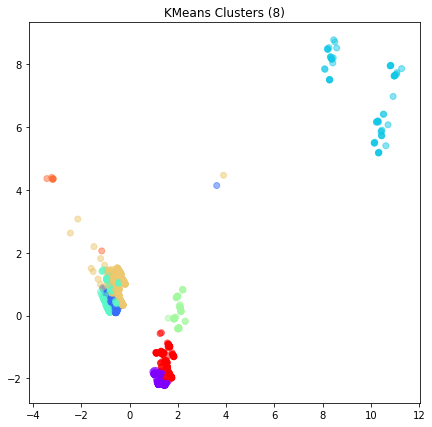

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


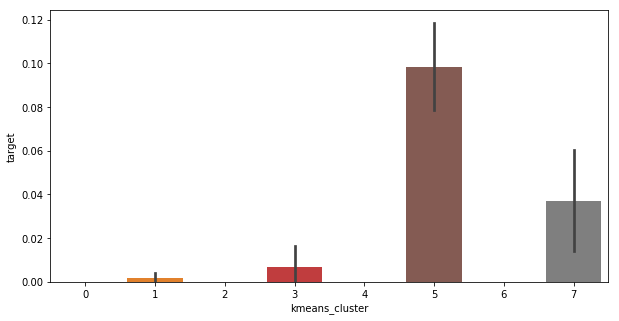

In [15]:
kmeans = KMeans(n_clusters=8)

X_clustered_num = kmeans.fit_predict(few_principalComponents)

# Plot the scatter diagram
plt.figure(figsize = (7,7))
plt.scatter(few_principalComponents[:,0],few_principalComponents[:,1], 
            c=kmeans.labels_,cmap='rainbow', alpha=0.5) 
plt.title('KMeans Clusters (8)')
plt.savefig('kmeans-clusters.png')
plt.show()


plt.figure(figsize=(10,5))
fewkmeans = kmeans.labels_
kmeans_y = y_target_vals
kmeans_y = kmeans_y.reshape(4511)
fewKMeansDF = pd.DataFrame({'kmeans_cluster':fewkmeans, 'target':kmeans_y})
sns.barplot(x='kmeans_cluster',y='target',data=fewKMeansDF)
plt.savefig('clusters-by-target.png')

In [21]:
few5 = fewKMeansDF.loc[fewKMeansDF['kmeans_cluster'] == 5]
few5.loc[3000:4000]

,kmeans_cluster,target
3009,5,0.0
3011,5,0.0
3014,5,0.0
3015,5,0.0
3020,5,0.0
3022,5,0.0
3033,5,0.0
3037,5,0.0
3050,5,0.0
3061,5,0.0


In [22]:
df.loc[[3009]]

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,...,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,list_loc_denver,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,is_violating
3009,27419666,https://www.airbnb.com/rooms/27419666,Our home is a classic mid-century brick house ...,"Guests will have access to a gas stove, washer...",Our home is a classic mid-century brick house ...,No smoking or pets in the house.,Our back patio is covered and has seating and ...,We will be as available as you need us to be. ...,- 11:00PM Quiet hours Smoking in back yard only.,206631142,...,0.0,1.0,1.0,0.0,1.0,1,0,0,0.0,0.0


In [18]:
# fewkmeans = kmeans.labels_

# kmeans_y = y_target_vals
# kmeans_y = kmeans_y.reshape(4511)

# fewKMeansDF = pd.DataFrame({'kmeans_cluster':fewkmeans, 'target':kmeans_y})

# sns.barplot(x='kmeans_cluster',y='target',data=fewKMeansDF)